<a href="https://colab.research.google.com/github/AriefRM/Distribution_of_Coal/blob/main/Natural_Resources_Coal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install geopandas

     |████████████████████████████████| 1.0 MB 5.1 MB/s 
     |████████████████████████████████| 6.3 MB 21.8 MB/s 
     |████████████████████████████████| 15.4 MB 39 kB/s 


In [2]:
import pandas as pd
import geopandas as gpd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from functools import reduce

%matplotlib inline


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# First Dataframe for geometri

In [4]:
df_geo = gpd.read_file('/content/drive/MyDrive/Colab Notebooks/Day 18/indonesia-province-jml-penduduk.json')
print(list(df_geo))
print(type(df_geo))
print
df_geo 

['ID', 'kode', 'Propinsi', 'SUMBER', 'Jumlah Penduduk', 'geometry']
<class 'geopandas.geodataframe.GeoDataFrame'>


,ID,kode,Propinsi,SUMBER,Jumlah Penduduk,geometry
0,1,85,IRIAN JAYA TIMUR,Peta Dasar BAKOSURTANAL Skala 1 : 250.000,1416690,"MULTIPOLYGON (((137.91666 -1.49852, 137.89260 ..."
1,2,52,NUSATENGGARA BARAT,Peta Dasar BAKOSURTANAL Skala 1 : 250.000,4500212,"MULTIPOLYGON (((117.62720 -8.50640, 117.62630 ..."
2,3,75,GORONTALO,Peta Dasar BAKOSURTANAL Skala 1 : 250.000,1040164,"MULTIPOLYGON (((122.18814 1.04530, 122.18883 1..."
3,4,74,SULAWESI TENGGARA,Peta Dasar BAKOSURTANAL Skala 1 : 250.000,2232586,"MULTIPOLYGON (((120.98423 -2.83534, 120.98502 ..."
4,5,34,DAERAH ISTIMEWA YOGYAKARTA,Peta Dasar BAKOSURTANAL Skala 1 : 250.000,3457491,"POLYGON ((110.01183 -7.88690, 110.01330 -7.885..."
5,6,3329,JAWA TENGAH,Peta Dasar BAKOSURTANAL Skala 1 : 250.000,32382657,"MULTIPOLYGON (((108.82934 -6.74608, 108.83061 ..."
6,7,36,PROBANTEN,Peta Dasar BAKOSURTANAL Skala 1 : 250.000,10632166,"MULTIPOLYGON (((106.72134 -6.09000, 106.71294 ..."
7,8,35,JAWA TIMUR,Peta Dasar BAKOSURTANAL Skala 1 : 250.000,37476757,"MULTIPOLYGON (((111.69460 -6.75286, 111.69649 ..."
8,9,81,MALUKU UTARA,Peta Dasar BAKOSURTANAL Skala 1 : 250.000,1038087,"MULTIPOLYGON (((127.74207 0.81629, 127.74280 0..."
9,10,82,MALUKU,Peta Dasar BAKOSURTANAL Skala 1 : 250.000,1533506,"MULTIPOLYGON (((130.83130 -3.47141, 130.83050 ..."


# Second Dataframe about Potential Coal Energy

In [5]:
PotensiBB = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Data Kaggle/Potensi/BB.xlsx')
PotensiBB

,potensi,nama_provinsi,nama_kabupaten,Komoditas,tahun,total_sd,total_cad,total_sd_2,total_cad_2
0,Batubara,Aceh,Aceh Barat,NaN,2015,NaN,450.150000,NaN,NaN
1,Batubara,Aceh,Aceh Barat,NaN,2016,NaN,1195.919382,NaN,NaN
2,Batubara,Aceh,Aceh Barat,NaN,2017,NaN,766.699382,NaN,NaN
3,Batubara,Aceh,Aceh Barat,NaN,2018,NaN,954.367382,NaN,NaN
4,Batubara,Aceh,Aceh Jaya,NaN,2015,NaN,0.490000,NaN,NaN
...,...,...,...,...,...,...,...,...,...
499,Batubara,Sumatera Selatan,-,NaN,2018,NaN,42051.117935,NaN,NaN
500,Batubara,Sumatera Utara,-,NaN,2015,NaN,27.220000,NaN,NaN
501,Batubara,Sumatera Utara,-,NaN,2016,NaN,34.587696,NaN,NaN
502,Batubara,Sumatera Utara,-,NaN,2017,NaN,14.617696,NaN,NaN


In [6]:
PotensiBB.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504 entries, 0 to 503
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   potensi         504 non-null    object 
 1   nama_provinsi   504 non-null    object 
 2   nama_kabupaten  504 non-null    object 
 3   Komoditas       0 non-null      float64
 4   tahun           504 non-null    int64  
 5   total_sd        0 non-null      float64
 6   total_cad       504 non-null    float64
 7   total_sd_2      0 non-null      float64
 8   total_cad_2     0 non-null      float64
dtypes: float64(5), int64(1), object(3)
memory usage: 35.6+ KB


# Data Cleaning and Manipulation

In [7]:
PotensiBB = PotensiBB.drop (columns=['total_sd','total_sd_2','total_cad_2','Komoditas','potensi','nama_kabupaten'])
PotensiBB

,nama_provinsi,tahun,total_cad
0,Aceh,2015,450.150000
1,Aceh,2016,1195.919382
2,Aceh,2017,766.699382
3,Aceh,2018,954.367382
4,Aceh,2015,0.490000
...,...,...,...
499,Sumatera Selatan,2018,42051.117935
500,Sumatera Utara,2015,27.220000
501,Sumatera Utara,2016,34.587696
502,Sumatera Utara,2017,14.617696


In [8]:
## Data manipulation to match the format
PotensiBB_2015 = PotensiBB.loc[PotensiBB['tahun'] == 2015]
PotensiBB_2015 = PotensiBB_2015.drop(columns = ['tahun'])
PotensiBB_2015 = PotensiBB_2015.groupby(['nama_provinsi'], as_index=False)['total_cad'].sum()
PotensiBB_2015 = PotensiBB_2015.rename(columns={'total_cad': '2015'})

In [9]:
PotensiBB_2016 = PotensiBB.loc[PotensiBB['tahun'] == 2016]
PotensiBB_2016 = PotensiBB_2016.drop(columns = ['tahun'])
PotensiBB_2016 = PotensiBB_2016.groupby(['nama_provinsi'], as_index=False)['total_cad'].sum()
PotensiBB_2016 = PotensiBB_2016.rename(columns={'total_cad': '2016'})

In [10]:
PotensiBB_2017 = PotensiBB.loc[PotensiBB['tahun'] == 2017]
PotensiBB_2017 = PotensiBB_2017.drop(columns = ['tahun'])
PotensiBB_2017 = PotensiBB_2017.groupby(['nama_provinsi'], as_index=False)['total_cad'].sum()
PotensiBB_2017 = PotensiBB_2017.rename(columns={'total_cad': '2017'})

In [11]:
PotensiBB_2018 = PotensiBB.loc[PotensiBB['tahun'] == 2018]
PotensiBB_2018 = PotensiBB_2018.drop(columns = ['tahun'])
PotensiBB_2018 = PotensiBB_2018.groupby(['nama_provinsi'], as_index=False)['total_cad'].sum()
PotensiBB_2018 = PotensiBB_2018.rename(columns={'total_cad': '2018'})

In [13]:
print(PotensiBB_2015)
print(PotensiBB_2016)
print(PotensiBB_2017)
print(PotensiBB_2018)

         nama_provinsi       2015
0                 Aceh     901.28
1               Banten   88122.00
2             Bengkulu     384.14
3                Jambi   23884.25
4          Jawa Tengah       1.64
5           Jawa Timur       0.16
6     Kalimantan Barat     983.00
7   Kalimantan Selatan   72899.50
8    Kalimantan Tengah    8209.74
9     Kalimantan Timur   94079.78
10    Kalimantan Utara    4113.60
11             Lampung     215.78
12        Maluku Utara   89459.00
13               Papua  144192.91
14         Papua Barat   77380.02
15                Riau   38195.50
16      Sulawesi Barat      31.82
17    Sulawesi Selatan   68883.20
18     Sulawesi Tengah   71592.00
19      Sumatera Barat   73659.08
20    Sumatera Selatan  102609.04
21      Sumatera Utara      54.44
         nama_provinsi          2016
0                 Aceh  2.500539e+03
1               Banten  1.960011e+02
2             Bengkulu  8.310777e+02
3                Jambi  2.357430e+04
4          Jawa Tengah  1.640000e

In [14]:
PotensiBB_Master = [PotensiBB_2015,PotensiBB_2016,PotensiBB_2017,PotensiBB_2018]
df_PotensiBB = reduce(lambda  left,right: pd.merge(left,right,on=['nama_provinsi'],
                                                 how='outer'), PotensiBB_Master).fillna(0)                                              

In [20]:
df_PotensiBB['nama_provinsi'] = df_PotensiBB['nama_provinsi'].apply(lambda x: 'Sulawesi Selatan' if x=='Sulawesi Barat' else x)
df_PotensiBB['nama_provinsi'] = df_PotensiBB['nama_provinsi'].apply(lambda x: 'Kalimantan Timur' if x=='Kalimantan Utara' else x)

In [23]:
df_PotensiBB = df_PotensiBB.groupby(['nama_provinsi'], as_index=False)['2015','2016','2017','2018'].sum()

In [24]:
A = {
    'Aceh': 32,
    'Banten' : 7,
    'Bengkulu' : 31,
    'Jambi':29,
    'Jawa Tengah' : 6, 
    'Jawa Timur' : 8,
    'Kalimantan Barat' : 12,
    'Kalimantan Selatan' : 11,
    'Kalimantan Tengah' : 27,
    'Kalimantan Timur' : 21,
    'Lampung' : 30,
    'Maluku Utara' : 9,
    'Papua':1,
    'Papua Barat':23,
    'Riau' : 19,
    'Sulawesi Selatan' : 13,
    'Sulawesi Tengah' : 20,
    'Sulawesi Tenggara' : 4,
    'Sumatera Barat' : 26,
    'Sumatera Selatan' : 28,
    'Sumatera Utara' : 24,
}

df_PotensiBB['ID'] = df_PotensiBB.ffill(axis=1)['nama_provinsi'].map(A)

In [25]:
df_PotensiBB

,nama_provinsi,2015,2016,2017,2018,ID
0,Aceh,901.28,2.500539e+03,1641.118764,2547.936764,32
1,Banten,88122.00,1.960011e+02,185.021144,115.136000,7
2,Bengkulu,384.14,8.310777e+02,401.890440,1114.852000,31
3,Jambi,23884.25,2.357430e+04,23608.333376,14575.481836,29
4,Jawa Tengah,1.64,1.640000e+00,1.640000,1.640000,6
5,Jawa Timur,0.16,1.600000e-01,0.160000,0.160000,8
6,Kalimantan Barat,983.00,9.830000e+02,776.994000,776.994000,12
7,Kalimantan Selatan,72899.50,1.064121e+06,34417.268496,38595.742626,11
8,Kalimantan Tengah,8209.74,1.938813e+04,36436.275600,20352.070364,27
9,Kalimantan Timur,98193.38,5.714648e+04,85933.906078,135216.168606,21


# Compile 2 dataframe

In [26]:
df_PotensiBBGeo = [df_geo,df_PotensiBB]
df_PotensiBBGeo

[    ID  ...                                           geometry
 0    1  ...  MULTIPOLYGON (((137.91666 -1.49852, 137.89260 ...
 1    2  ...  MULTIPOLYGON (((117.62720 -8.50640, 117.62630 ...
 2    3  ...  MULTIPOLYGON (((122.18814 1.04530, 122.18883 1...
 3    4  ...  MULTIPOLYGON (((120.98423 -2.83534, 120.98502 ...
 4    5  ...  POLYGON ((110.01183 -7.88690, 110.01330 -7.885...
 5    6  ...  MULTIPOLYGON (((108.82934 -6.74608, 108.83061 ...
 6    7  ...  MULTIPOLYGON (((106.72134 -6.09000, 106.71294 ...
 7    8  ...  MULTIPOLYGON (((111.69460 -6.75286, 111.69649 ...
 8    9  ...  MULTIPOLYGON (((127.74207 0.81629, 127.74280 0...
 9   10  ...  MULTIPOLYGON (((130.83130 -3.47141, 130.83050 ...
 10  11  ...  MULTIPOLYGON (((115.75000 -1.31434, 115.75000 ...
 11  12  ...  MULTIPOLYGON (((114.20497 1.40755, 114.20126 1...
 12  13  ...  MULTIPOLYGON (((119.55126 -0.86110, 119.55648 ...
 13  14  ...  MULTIPOLYGON (((106.72134 -6.09000, 106.72354 ...
 14  15  ...  MULTIPOLYGON (((106.39610 

In [27]:
df_geoPotensiBB = reduce(lambda  left,right: pd.merge(left,right,on=['ID'],
                                                      how='outer'), df_PotensiBBGeo).fillna(0)

df_geoPotensiBB

,ID,kode,Propinsi,SUMBER,Jumlah Penduduk,geometry,nama_provinsi,2015,2016,2017,2018
0,1,85,IRIAN JAYA TIMUR,Peta Dasar BAKOSURTANAL Skala 1 : 250.000,1416690,"MULTIPOLYGON (((137.91666 -1.49852, 137.89260 ...",Papua,144192.91,1.463839e+05,86247.544000,86247.544000
1,2,52,NUSATENGGARA BARAT,Peta Dasar BAKOSURTANAL Skala 1 : 250.000,4500212,"MULTIPOLYGON (((117.62720 -8.50640, 117.62630 ...",0,0.00,0.000000e+00,0.000000,0.000000
2,3,75,GORONTALO,Peta Dasar BAKOSURTANAL Skala 1 : 250.000,1040164,"MULTIPOLYGON (((122.18814 1.04530, 122.18883 1...",0,0.00,0.000000e+00,0.000000,0.000000
3,4,74,SULAWESI TENGGARA,Peta Dasar BAKOSURTANAL Skala 1 : 250.000,2232586,"MULTIPOLYGON (((120.98423 -2.83534, 120.98502 ...",Sulawesi Tenggara,0.00,0.000000e+00,1.272000,1.272000
4,5,34,DAERAH ISTIMEWA YOGYAKARTA,Peta Dasar BAKOSURTANAL Skala 1 : 250.000,3457491,"POLYGON ((110.01183 -7.88690, 110.01330 -7.885...",0,0.00,0.000000e+00,0.000000,0.000000
5,6,3329,JAWA TENGAH,Peta Dasar BAKOSURTANAL Skala 1 : 250.000,32382657,"MULTIPOLYGON (((108.82934 -6.74608, 108.83061 ...",Jawa Tengah,1.64,1.640000e+00,1.640000,1.640000
6,7,36,PROBANTEN,Peta Dasar BAKOSURTANAL Skala 1 : 250.000,10632166,"MULTIPOLYGON (((106.72134 -6.09000, 106.71294 ...",Banten,88122.00,1.960011e+02,185.021144,115.136000
7,8,35,JAWA TIMUR,Peta Dasar BAKOSURTANAL Skala 1 : 250.000,37476757,"MULTIPOLYGON (((111.69460 -6.75286, 111.69649 ...",Jawa Timur,0.16,1.600000e-01,0.160000,0.160000
8,9,81,MALUKU UTARA,Peta Dasar BAKOSURTANAL Skala 1 : 250.000,1038087,"MULTIPOLYGON (((127.74207 0.81629, 127.74280 0...",Maluku Utara,89459.00,8.945900e+04,25334.744000,25334.744000
9,10,82,MALUKU,Peta Dasar BAKOSURTANAL Skala 1 : 250.000,1533506,"MULTIPOLYGON (((130.83130 -3.47141, 130.83050 ...",0,0.00,0.000000e+00,0.000000,0.000000


In [30]:
df_geoPotensiBB = df_geoPotensiBB.drop(columns=['nama_provinsi'])
df_geoPotensiBB

,ID,kode,Propinsi,SUMBER,Jumlah Penduduk,geometry,2015,2016,2017,2018
0,1,85,IRIAN JAYA TIMUR,Peta Dasar BAKOSURTANAL Skala 1 : 250.000,1416690,"MULTIPOLYGON (((137.91666 -1.49852, 137.89260 ...",144192.91,1.463839e+05,86247.544000,86247.544000
1,2,52,NUSATENGGARA BARAT,Peta Dasar BAKOSURTANAL Skala 1 : 250.000,4500212,"MULTIPOLYGON (((117.62720 -8.50640, 117.62630 ...",0.00,0.000000e+00,0.000000,0.000000
2,3,75,GORONTALO,Peta Dasar BAKOSURTANAL Skala 1 : 250.000,1040164,"MULTIPOLYGON (((122.18814 1.04530, 122.18883 1...",0.00,0.000000e+00,0.000000,0.000000
3,4,74,SULAWESI TENGGARA,Peta Dasar BAKOSURTANAL Skala 1 : 250.000,2232586,"MULTIPOLYGON (((120.98423 -2.83534, 120.98502 ...",0.00,0.000000e+00,1.272000,1.272000
4,5,34,DAERAH ISTIMEWA YOGYAKARTA,Peta Dasar BAKOSURTANAL Skala 1 : 250.000,3457491,"POLYGON ((110.01183 -7.88690, 110.01330 -7.885...",0.00,0.000000e+00,0.000000,0.000000
5,6,3329,JAWA TENGAH,Peta Dasar BAKOSURTANAL Skala 1 : 250.000,32382657,"MULTIPOLYGON (((108.82934 -6.74608, 108.83061 ...",1.64,1.640000e+00,1.640000,1.640000
6,7,36,PROBANTEN,Peta Dasar BAKOSURTANAL Skala 1 : 250.000,10632166,"MULTIPOLYGON (((106.72134 -6.09000, 106.71294 ...",88122.00,1.960011e+02,185.021144,115.136000
7,8,35,JAWA TIMUR,Peta Dasar BAKOSURTANAL Skala 1 : 250.000,37476757,"MULTIPOLYGON (((111.69460 -6.75286, 111.69649 ...",0.16,1.600000e-01,0.160000,0.160000
8,9,81,MALUKU UTARA,Peta Dasar BAKOSURTANAL Skala 1 : 250.000,1038087,"MULTIPOLYGON (((127.74207 0.81629, 127.74280 0...",89459.00,8.945900e+04,25334.744000,25334.744000
9,10,82,MALUKU,Peta Dasar BAKOSURTANAL Skala 1 : 250.000,1533506,"MULTIPOLYGON (((130.83130 -3.47141, 130.83050 ...",0.00,0.000000e+00,0.000000,0.000000


Text(0.5, 0.98, 'Distribution of Coal year to year')

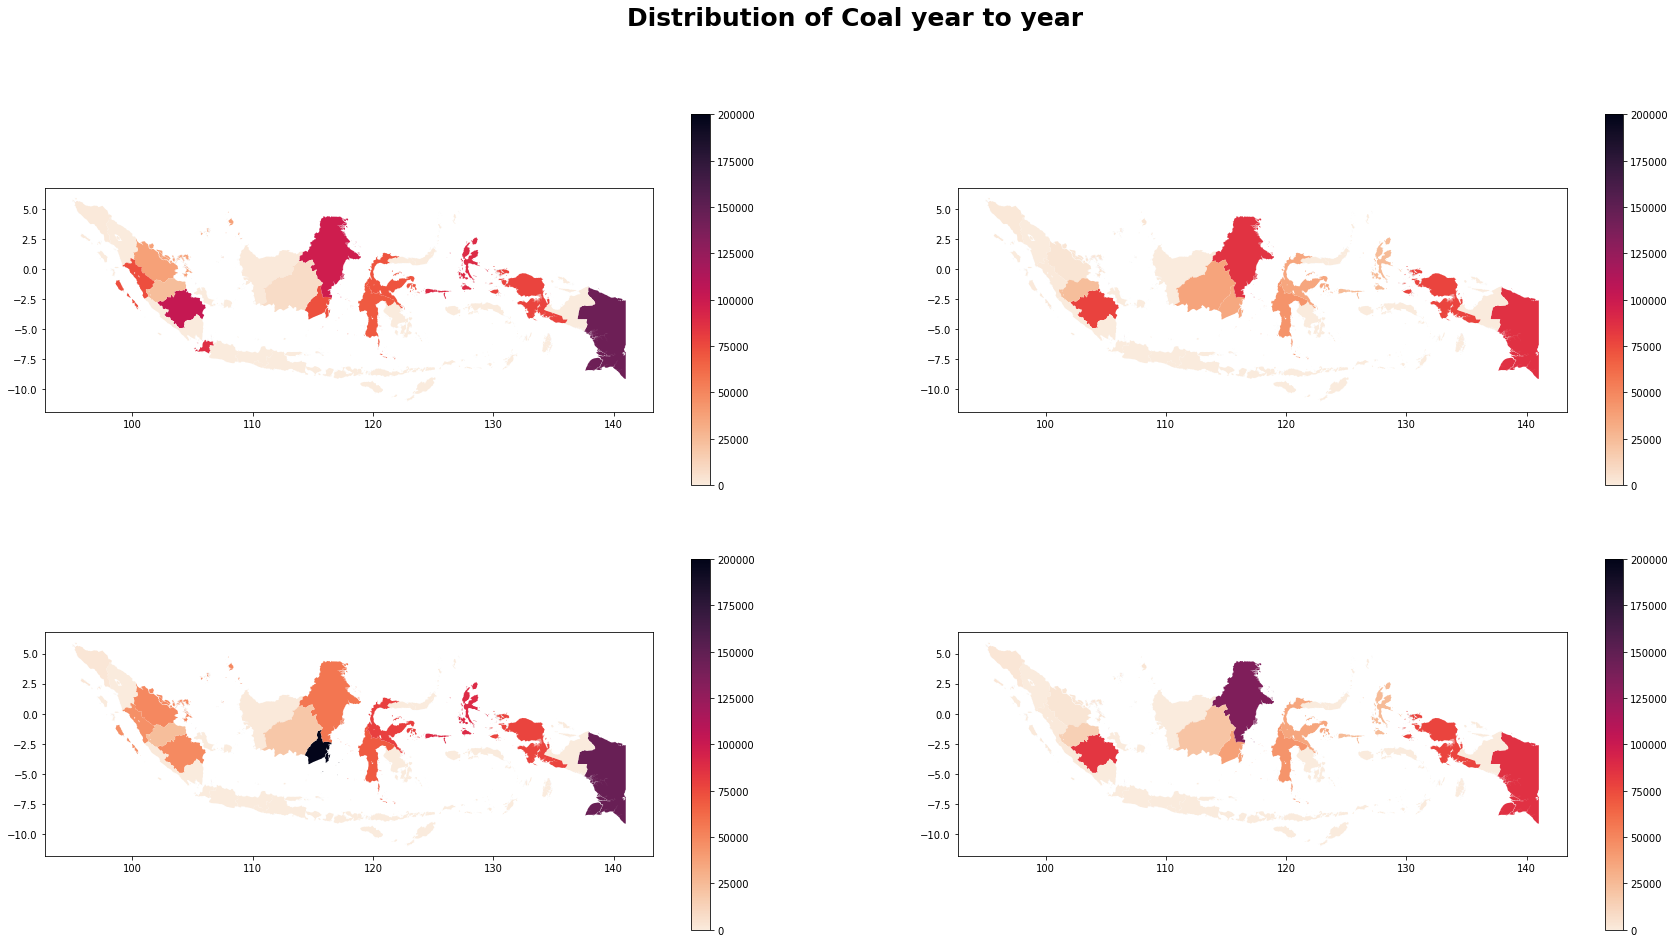

In [47]:
fig, ax = plt.subplots(2, 2, figsize=(30, 15))

A = df_geoPotensiBB[df_geoPotensiBB['2015'].notnull()] # pick rows where Jumlah Penduduk is not null, just in case
df_geoPotensiBB.plot(column='2015', ax=ax[0,0], legend=True, cmap='rocket_r',vmin=0,vmax=200000)

B = df_geoPotensiBB[df_geoPotensiBB['2016'].notnull()] # pick rows where Jumlah Penduduk is not null, just in case
df_geoPotensiBB.plot(column='2016', ax=ax[1,0], legend=True, cmap='rocket_r',vmin=0,vmax=200000)

C = df_geoPotensiBB[df_geoPotensiBB['2017'].notnull()] # pick rows where Jumlah Penduduk is not null, just in case
df_geoPotensiBB.plot(column='2017', ax=ax[0,1], legend=True, cmap='rocket_r',vmin=0,vmax=200000)

D = df_geoPotensiBB[df_geoPotensiBB['2018'].notnull()] # pick rows where Jumlah Penduduk is not null, just in case
df_geoPotensiBB.plot(column='2018', ax=ax[1,1], legend=True, cmap='rocket_r',vmin=0,vmax=200000)

fig.suptitle('Distribution of Coal year to year', fontsize=25, fontweight='bold')

# Set label
# A.set_title('Year 2015', fontsize=20, fontweight='bold')
# B.set_title('Year 2016', fontsize=20, fontweight='bold')
# C.set_title('Year 2017', fontsize=20, fontweight='bold')
# D.set_title('Year 2018', fontsize=20, fontweight='bold')
